In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Low Leader data
avgEmofileL = r'C:\Users\SEscottoRo\OneDrive - Toyota Industries Group North America\Documents\My stuff\other\Masters\523\Simulation\same2\Leader L\Final Results\Avg_Emotion_Evolution_Over_30_Simulations_Low.csv'
intvBoolFileL = r'C:\Users\SEscottoRo\OneDrive - Toyota Industries Group North America\Documents\My stuff\other\Masters\523\Simulation\same2\Leader L\Intervention\Intervention_BooleanMatrix_Low.csv'

dfLow = pd.read_csv(avgEmofileL)
dfIntvBoolLow = pd.read_csv(intvBoolFileL)

# High Leader data
avgEmofileH = r'C:\Users\SEscottoRo\OneDrive - Toyota Industries Group North America\Documents\My stuff\other\Masters\523\Simulation\same2\Leader H\Final Results\Avg_Emotion_Evolution_Over_30_Simulations_High.csv'
intvBoolFileH = r'C:\Users\SEscottoRo\OneDrive - Toyota Industries Group North America\Documents\My stuff\other\Masters\523\Simulation\same2\Leader H\Intervention\Intervention_BooleanMatrix_High.csv'

dfHigh = pd.read_csv(avgEmofileH)
dfIntvBoolHigh = pd.read_csv(intvBoolFileH)

# NOTE: AI such as ChatGPT and Co-pilot were used to help with the code below, though I can explain it along with the intention behind the statistics if needed.
# This was to help give us a starting point and an idea of what is going on in the data, hence it is relatively simple and only a few of the results were selected to be included (and therefore interpreted) in the paper.

For now, since the model is still being tweaked, I am focusing on what we can tell which is the simple statistics and differences in results between High vs Low

In [260]:
print(dfLow.shape)
print(dfHigh.shape)
print(dfIntvBoolLow.shape)
print(dfIntvBoolHigh.shape)

(501, 31)
(501, 31)
(501, 30)
(501, 30)


In [215]:
dfLow.head()

,Time,Run_1,Run_2,Run_3,Run_4,Run_5,Run_6,Run_7,Run_8,Run_9,...,Run_21,Run_22,Run_23,Run_24,Run_25,Run_26,Run_27,Run_28,Run_29,Run_30
0,0,-0.211450,-0.170366,-0.552585,-0.540899,-0.419332,-0.535115,-0.409550,-0.406188,-0.565781,...,-0.373873,-0.361234,-0.331965,-0.475169,-0.366796,-0.259717,-0.458263,-0.402458,-0.581073,-0.167225
1,1,-0.211474,-0.170661,-0.548259,-0.539311,-0.420875,-0.534804,-0.406256,-0.408359,-0.565921,...,-0.371710,-0.363324,-0.323389,-0.478490,-0.365103,-0.236859,-0.467257,-0.398249,-0.580807,-0.162897
2,2,-0.209527,-0.168628,-0.542313,-0.538263,-0.425265,-0.537470,-0.404111,-0.409089,-0.564637,...,-0.369791,-0.363965,-0.317532,-0.479521,-0.368022,-0.234191,-0.473661,-0.397987,-0.579637,-0.160997
3,3,-0.211079,-0.168857,-0.541053,-0.539108,-0.428082,-0.540071,-0.403310,-0.410583,-0.565290,...,-0.370779,-0.364244,-0.316909,-0.479433,-0.369336,-0.227238,-0.474991,-0.397366,-0.579003,-0.159214
4,4,-0.210527,-0.170949,-0.538852,-0.539820,-0.430654,-0.541124,-0.404437,-0.410801,-0.564790,...,-0.373442,-0.365459,-0.314770,-0.480924,-0.369978,-0.218530,-0.476980,-0.397331,-0.578020,-0.159924


In [216]:
dfIntvBoolHigh.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
1,0,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,0
2,0,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,0
3,0,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,0
4,0,0,1,1,1,1,1,1,1,1,...,1,1,0,1,1,0,1,1,1,0


In [217]:
dfIntvBoolHigh.columns = [f'Run_{i+1}' for i in range(dfIntvBoolHigh.shape[1])]
dfIntvBoolLow.columns = [f'Run_{i+1}' for i in range(dfIntvBoolHigh.shape[1])]
dfIntvBoolHigh.head()

,Run_1,Run_2,Run_3,Run_4,Run_5,Run_6,Run_7,Run_8,Run_9,Run_10,...,Run_21,Run_22,Run_23,Run_24,Run_25,Run_26,Run_27,Run_28,Run_29,Run_30
0,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
1,0,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,0
2,0,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,0
3,0,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,0
4,0,0,1,1,1,1,1,1,1,1,...,1,1,0,1,1,0,1,1,1,0


# Statistics for High Leader

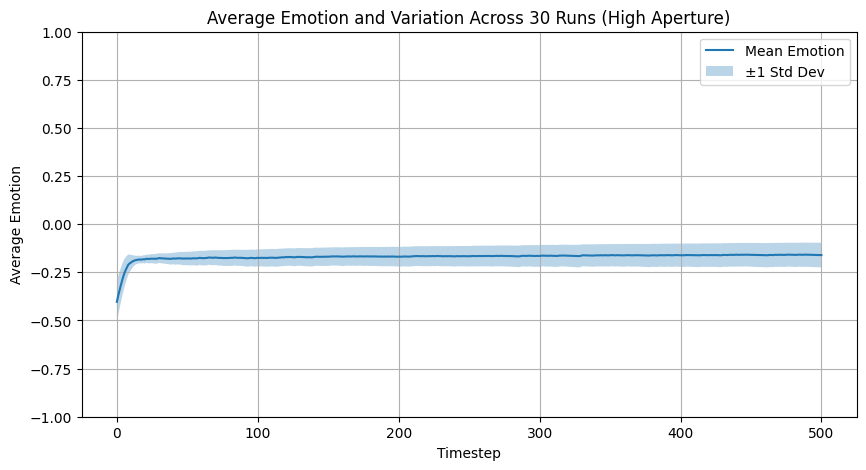

In [ ]:
mean_emotion_per_timestep = dfHigh.iloc[:, 1:].mean(axis=1)
std_emotion_per_timestep = dfHigh.iloc[:, 1:].std(axis=1)

plt.figure(figsize=(10, 5))
plt.plot(dfHigh['Time'], mean_emotion_per_timestep, label="Mean Emotion")
plt.fill_between(dfHigh['Time'],
                 mean_emotion_per_timestep - std_emotion_per_timestep,
                 mean_emotion_per_timestep + std_emotion_per_timestep,
                 alpha=0.3, label="±1 Std Dev")
plt.title("Average Emotion and Variation Across 30 Runs (High Aperture)")
plt.xlabel("Timestep")
plt.ylabel("Average Emotion")
plt.ylim(-1, 1)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print(f"Mean: {mean_emotion_per_timestep}")
print(f"Std Dev: {std_emotion_per_timestep}")
cv_emotion_per_timestep = std_emotion_per_timestep / mean_emotion_per_timestep.abs()

sig_cv = cv_emotion_per_timestep[cv_emotion_per_timestep > 1]
if sig_cv.empty:
    print("No significant coefficient of variation found.")
else:
    print(sig_cv)

Mean: 0     -0.402980
1     -0.368955
2     -0.339627
3     -0.311618
4     -0.284896
         ...   
496   -0.159661
497   -0.159807
498   -0.159929
499   -0.160139
500   -0.160322
Length: 501, dtype: float64
Std Dev: 0      0.106555
1      0.102759
2      0.094886
3      0.088212
4      0.082938
         ...   
496    0.063628
497    0.063710
498    0.063799
499    0.063932
500    0.064075
Length: 501, dtype: float64
No significant coefficient of variation found.


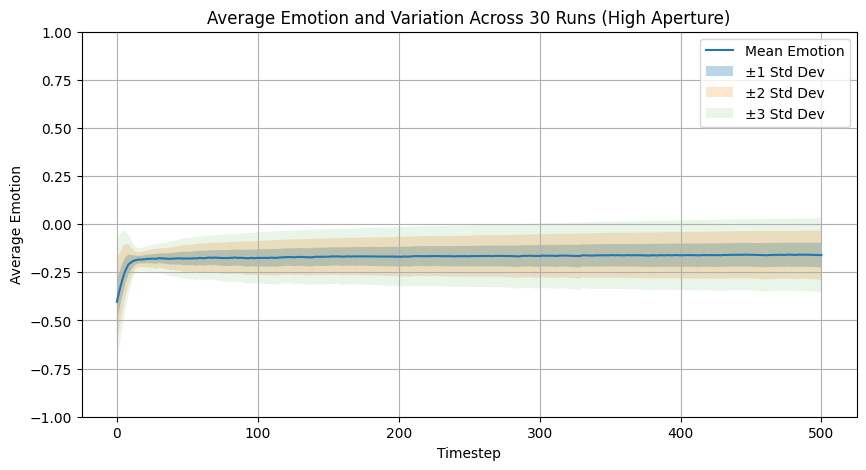

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(dfHigh['Time'], mean_emotion_per_timestep, label="Mean Emotion")

# ±1 Std Dev
plt.fill_between(dfHigh['Time'],
                 mean_emotion_per_timestep - std_emotion_per_timestep,
                 mean_emotion_per_timestep + std_emotion_per_timestep,
                 alpha=0.3, label="±1 Std Dev")

# ±2 Std Dev
plt.fill_between(dfHigh['Time'],
                 mean_emotion_per_timestep - 2 * std_emotion_per_timestep,
                 mean_emotion_per_timestep + 2 * std_emotion_per_timestep,
                 alpha=0.2, label="±2 Std Dev")

# ±3 Std Dev
plt.fill_between(dfHigh['Time'],
                 mean_emotion_per_timestep - 3 * std_emotion_per_timestep,
                 mean_emotion_per_timestep + 3 * std_emotion_per_timestep,
                 alpha=0.1, label="±3 Std Dev")

plt.title("Average Emotion and Variation Across 30 Runs (High Aperture)")
plt.xlabel("Timestep")
plt.ylabel("Average Emotion")
plt.ylim(-1, 1)
plt.legend()
plt.grid(True)
plt.show()

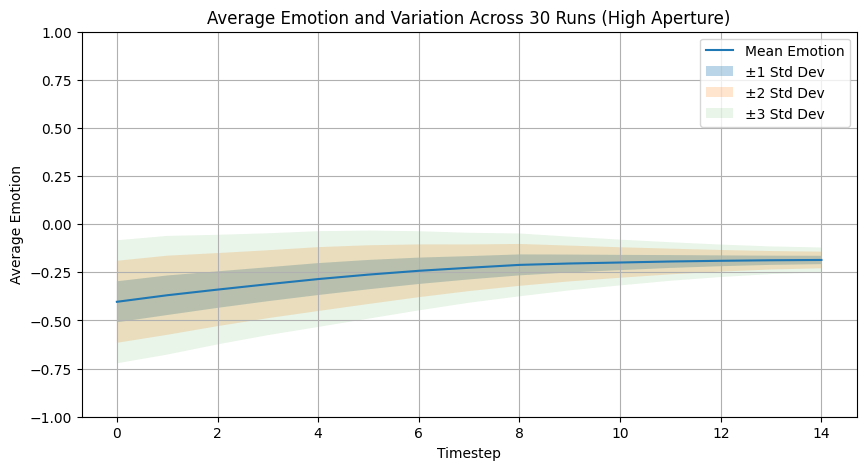

In [ ]:
df = dfHigh.iloc[:15,:]
mean_emotion_per_timestep = df.iloc[:, 1:].mean(axis=1)
std_emotion_per_timestep = df.iloc[:, 1:].std(axis=1)

plt.figure(figsize=(10, 5))
plt.plot(df['Time'], mean_emotion_per_timestep, label="Mean Emotion")

# ±1 Std Dev
plt.fill_between(df['Time'],
                 mean_emotion_per_timestep - std_emotion_per_timestep,
                 mean_emotion_per_timestep + std_emotion_per_timestep,
                 alpha=0.3, label="±1 Std Dev")

# ±2 Std Dev
plt.fill_between(df['Time'],
                 mean_emotion_per_timestep - 2 * std_emotion_per_timestep,
                 mean_emotion_per_timestep + 2 * std_emotion_per_timestep,
                 alpha=0.2, label="±2 Std Dev")

# ±3 Std Dev
plt.fill_between(df['Time'],
                 mean_emotion_per_timestep - 3 * std_emotion_per_timestep,
                 mean_emotion_per_timestep + 3 * std_emotion_per_timestep,
                 alpha=0.1, label="±3 Std Dev")

plt.title("Average Emotion and Variation Across 30 Runs (High Aperture)")
plt.xlabel("Timestep")
plt.ylabel("Average Emotion")
plt.ylim(-1, 1)
plt.legend()
plt.grid(True)
plt.show()

# Statistics for Low Leader

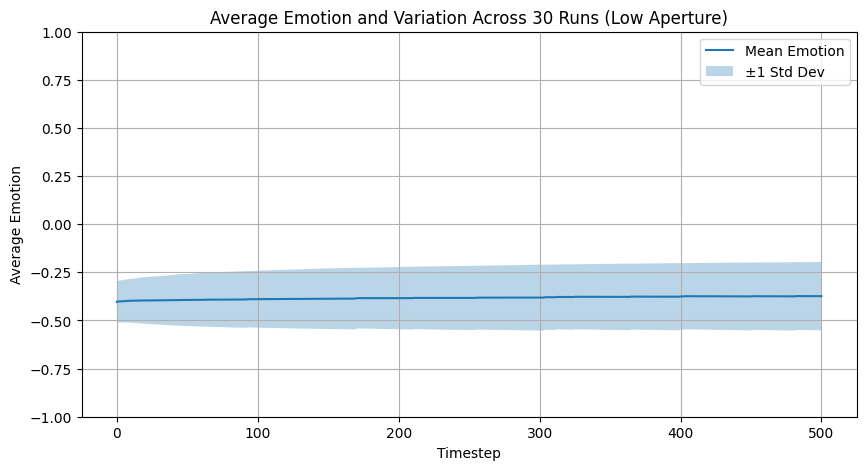

In [ ]:
mean_emotion_per_timestep = dfLow.iloc[:, 1:].mean(axis=1)
std_emotion_per_timestep = dfLow.iloc[:, 1:].std(axis=1)

plt.figure(figsize=(10, 5))
plt.plot(dfLow['Time'], mean_emotion_per_timestep, label="Mean Emotion")
plt.fill_between(dfLow['Time'],
                 mean_emotion_per_timestep - std_emotion_per_timestep,
                 mean_emotion_per_timestep + std_emotion_per_timestep,
                 alpha=0.3, label="±1 Std Dev")
plt.title("Average Emotion and Variation Across 30 Runs (Low Aperture)")
plt.xlabel("Timestep")
plt.ylabel("Average Emotion")
plt.ylim(-1, 1)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print(f"Mean: {mean_emotion_per_timestep}")
print(f"Std Dev: {std_emotion_per_timestep}")
cv_emotion_per_timestep = std_emotion_per_timestep / mean_emotion_per_timestep.abs()

sig_cv = cv_emotion_per_timestep[cv_emotion_per_timestep > 1]
if sig_cv.empty:
    print("No significant coefficient of variation found.")  # so there's not any significant variation in the data for either leader in terms of average emotions ~ the model is pretty stable
else:
    print(sig_cv)

Mean: 0     -0.402980
1     -0.401490
2     -0.400950
3     -0.400734
4     -0.400471
         ...   
496   -0.373686
497   -0.373707
498   -0.373703
499   -0.373749
500   -0.373777
Length: 501, dtype: float64
Std Dev: 0      0.106555
1      0.108195
2      0.108764
3      0.109345
4      0.109694
         ...   
496    0.177173
497    0.177195
498    0.177244
499    0.177304
500    0.177379
Length: 501, dtype: float64
No significant coefficient of variation found.


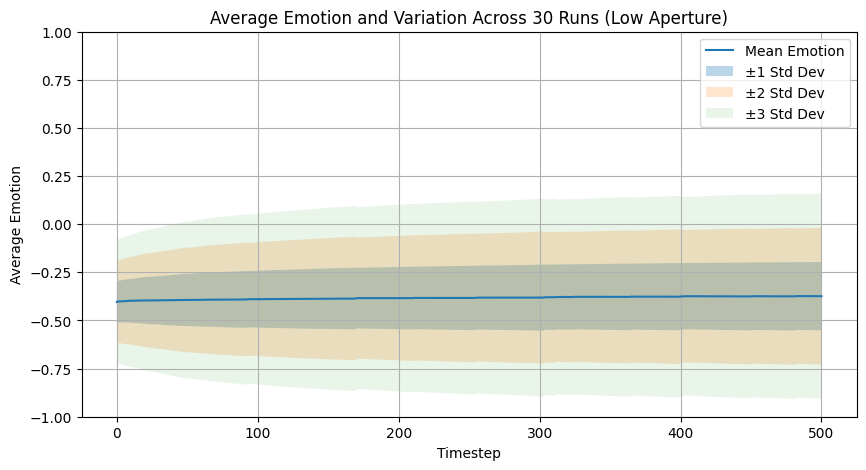

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(dfLow['Time'], mean_emotion_per_timestep, label="Mean Emotion")

# ±1 Std Dev
plt.fill_between(dfLow['Time'],
                 mean_emotion_per_timestep - std_emotion_per_timestep,
                 mean_emotion_per_timestep + std_emotion_per_timestep,
                 alpha=0.3, label="±1 Std Dev")

# ±2 Std Dev
plt.fill_between(dfLow['Time'],
                 mean_emotion_per_timestep - 2 * std_emotion_per_timestep,
                 mean_emotion_per_timestep + 2 * std_emotion_per_timestep,
                 alpha=0.2, label="±2 Std Dev")

# ±3 Std Dev
plt.fill_between(dfLow['Time'],
                 mean_emotion_per_timestep - 3 * std_emotion_per_timestep,
                 mean_emotion_per_timestep + 3 * std_emotion_per_timestep,
                 alpha=0.1, label="±3 Std Dev")

plt.title("Average Emotion and Variation Across 30 Runs (Low Aperture)")
plt.xlabel("Timestep")
plt.ylabel("Average Emotion")
plt.ylim(-1, 1)
plt.legend()
plt.grid(True)
plt.show()

# Comparison Statistics on Intervention

In [ ]:
num_interventions_high = dfIntvBoolHigh.sum(axis=0)  # Sum along rows for each column (simulation run)
num_interventions_low = dfIntvBoolLow.sum(axis=0)

summary = pd.DataFrame({
    'Leader Type': ['High', 'Low'],
    'Mean Interventions': [num_interventions_high.mean(), num_interventions_low.mean()],
    'Std Dev': [num_interventions_high.std(), num_interventions_low.std()],
    'Min': [num_interventions_high.min(), num_interventions_low.min()],
    'Max': [num_interventions_high.max(), num_interventions_low.max()]
})

print(summary)

  Leader Type  Mean Interventions    Std Dev  Min  Max
0        High           15.466667  12.818987    0   48
1         Low            0.433333   1.040004    0    3


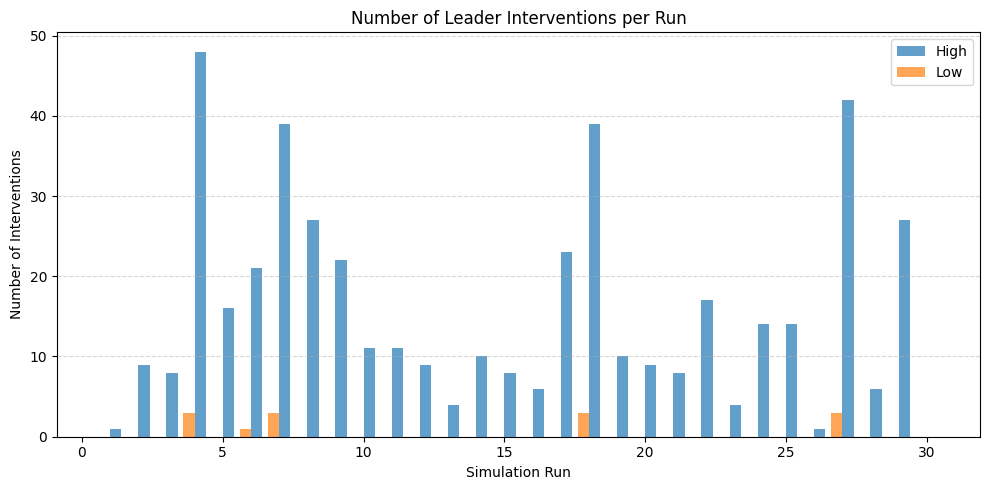

In [ ]:
num_interventions_high = dfIntvBoolHigh.sum(axis=0)
num_interventions_low = dfIntvBoolLow.sum(axis=0)

dfIntvListHigh = pd.DataFrame({
    'Run': range(1, len(num_interventions_high) + 1),  # Simulation runs (1-indexed)
    'Num_Interventions': num_interventions_high
})

dfIntvListLow = pd.DataFrame({
    'Run': range(1, len(num_interventions_low) + 1),
    'Num_Interventions': num_interventions_low
})

plt.figure(figsize=(10, 5))
plt.bar(dfIntvListHigh['Run'], dfIntvListHigh['Num_Interventions'], alpha=0.7, label='High', width=0.4, align='edge')
plt.bar(dfIntvListLow['Run'], dfIntvListLow['Num_Interventions'], alpha=0.7, label='Low', width=-0.4, align='edge')

plt.xlabel("Simulation Run")
plt.ylabel("Number of Interventions")
plt.title("Number of Leader Interventions per Run")
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
run_columns_high = dfHigh.columns.drop('Time')
initial_emotion_high = dfHigh.loc[0, run_columns_high]
final_emotion_high = dfHigh.loc[dfHigh.index[-1], run_columns_high]
intervened_runs_high = dfIntvBoolHigh.any(axis=0)

run_columns_low = dfLow.columns.drop('Time')
initial_emotion_low = dfLow.loc[0, run_columns_low]
final_emotion_low = dfLow.loc[dfLow.index[-1], run_columns_low]
intervened_runs_low = dfIntvBoolLow.any(axis=0)

df_compare_high = pd.DataFrame({
    'Run': range(1, len(initial_emotion_high) + 1),
    'Initial Emotion': initial_emotion_high,
    'Final Emotion': final_emotion_high,
    'Leader Type': 'High'
}).loc[intervened_runs_high.values]

df_compare_low = pd.DataFrame({
    'Run': range(1, len(initial_emotion_low) + 1),
    'Initial Emotion': initial_emotion_low,
    'Final Emotion': final_emotion_low,
    'Leader Type': 'Low'
}).loc[intervened_runs_low.values]

df_compare = pd.concat([df_compare_high, df_compare_low], ignore_index=True)
print(df_compare.head())

   Run  Initial Emotion  Final Emotion Leader Type
0    1        -0.211450      -0.161204        High
1    2        -0.170366      -0.180136        High
2    3        -0.552585      -0.182851        High
3    4        -0.540899      -0.191677        High
4    5        -0.419332      -0.178741        High


In [229]:
summary = df_compare.groupby('Leader Type')[['Initial Emotion', 'Final Emotion']].agg(['mean', 'std', 'min', 'max'])
print(summary)

            Initial Emotion                               Final Emotion  \
                       mean       std       min       max          mean   
Leader Type                                                               
High              -0.411109  0.098519 -0.581073 -0.170366     -0.162485   
Low               -0.474760  0.060306 -0.540899 -0.409550     -0.583190   

                                           
                  std       min       max  
Leader Type                                
High         0.064084 -0.200355  0.071760  
Low          0.008994 -0.596422 -0.571661  


### Something prettier

In [ ]:
def analyze_emotion(df, label="Low"):
    # Remove Time column (first column)
    emotion_matrix = df.iloc[:, 1:].to_numpy()  # shape = [time, simulation]

    # Basic stats
    mean_emotion = np.mean(emotion_matrix)
    std_emotion = np.std(emotion_matrix)
    cv_emotion = std_emotion / abs(mean_emotion) if mean_emotion != 0 else np.nan
    min_emotion = np.min(emotion_matrix)
    max_emotion = np.max(emotion_matrix)

    # Volatility: std per sim, averaged
    std_per_sim = np.std(emotion_matrix, axis=0)
    avg_std_per_sim = np.mean(std_per_sim)

    # CV per sim, averaged
    mean_per_sim = np.mean(emotion_matrix, axis=0)
    cv_per_sim = np.divide(std_per_sim, np.abs(mean_per_sim), where=mean_per_sim!=0)
    avg_cv_per_sim = np.mean(cv_per_sim)

    # Number of emotion crossings (sign changes)
    crossings_per_sim = np.sum(np.diff(np.sign(emotion_matrix), axis=0) != 0, axis=0)
    avg_crossings = np.mean(crossings_per_sim)

    # ΔEmotion (first difference volatility)
    delta_emotion = np.abs(np.diff(emotion_matrix, axis=0))
    avg_delta = np.mean(delta_emotion)

    return {
        f"{label} - Mean Emotion": mean_emotion,
        f"{label} - Std Emotion": std_emotion,
        f"{label} - CV (Total)": cv_emotion,
        f"{label} - Min Emotion": min_emotion,
        f"{label} - Max Emotion": max_emotion,
        f"{label} - Avg Std per Sim": avg_std_per_sim,
        f"{label} - Avg CV per Sim": avg_cv_per_sim,
        f"{label} - Avg Sign Crossings": avg_crossings,
        f"{label} - Avg ΔEmotion": avg_delta
    }

def analyze_interventions(intv_bool_matrix, label="Low"):
    intv_matrix = intv_bool_matrix.to_numpy()  # shape = [time, simulation]

    intv_per_sim = np.sum(intv_matrix, axis=0)

    mean_intv = np.mean(intv_per_sim)
    std_intv = np.std(intv_per_sim)
    min_intv = np.min(intv_per_sim)
    max_intv = np.max(intv_per_sim)

    # Number of simulations where at least one intervention occurred
    sims_with_intv = np.sum(np.any(intv_matrix, axis=0))

    return {
        f"{label} - Avg Interventions per Sim": mean_intv,
        f"{label} - Std Interventions": std_intv,
        f"{label} - Min Interventions": min_intv,
        f"{label} - Max Interventions": max_intv,
        f"{label} - Sims w/ Interventions": sims_with_intv,
    }

In [ ]:
emotion_stats_low = analyze_emotion(dfLow, label="Low")
emotion_stats_high = analyze_emotion(dfHigh, label="High")

intervention_stats_low = analyze_interventions(dfIntvBoolLow, label="Low")
intervention_stats_high = analyze_interventions(dfIntvBoolHigh, label="High")

summary_stats = {**emotion_stats_low, **intervention_stats_low,
                 **emotion_stats_high, **intervention_stats_high}

summary_df = pd.DataFrame.from_dict(summary_stats, orient='index', columns=["Value"])
print(summary_df.round(3))
summary_df.to_csv(r'C:\Users\SEscottoRo\OneDrive - Toyota Industries Group North America\Documents\My stuff\other\Masters\523\Simulation\same\summary2.csv')

                                   Value
Low - Mean Emotion                -0.383
Low - Std Emotion                  0.159
Low - CV (Total)                   0.414
Low - Min Emotion                 -0.601
Low - Max Emotion                  0.059
Low - Avg Std per Sim              0.024
Low - Avg CV per Sim               0.149
Low - Avg Sign Crossings           0.033
Low - Avg ΔEmotion                 0.000
Low - Avg Interventions per Sim    0.433
Low - Std Interventions            1.023
Low - Min Interventions            0.000
Low - Max Interventions            3.000
Low - Sims w/ Interventions        5.000
High - Mean Emotion               -0.169
High - Std Emotion                 0.056
High - CV (Total)                  0.331
High - Min Emotion                -0.581
High - Max Emotion                 0.072
High - Avg Std per Sim             0.024
High - Avg CV per Sim              0.188
High - Avg Sign Crossings          0.067
High - Avg ΔEmotion                0.001
High - Avg Inter

In [ ]:
bool_low = np.array(dfIntvBoolLow)
bool_high = np.array(dfIntvBoolHigh)

# Sum over time (rows) to see if any intervention occurred in each simulation (column)
intervened_low = np.any(bool_low == 1, axis=0)
intervened_high = np.any(bool_high == 1, axis=0)

# Find simulations where both are True
both_intervened = np.where(intervened_low & intervened_high)[0]  # indices of simulations

both_intervened_runs = both_intervened + 1

print("where both leaders intervened:", both_intervened_runs)

where both leaders intervened: [ 4  6  7 18 27]


In [ ]:
bool_high = np.array(dfIntvBoolHigh)

# Sum over time axis; 0 means no interventions
no_intervention_high = np.where(np.sum(bool_high, axis=0) == 0)[0]

no_intervention_high_runs = no_intervention_high + 1

print("where High leader did NOT intervene:", no_intervention_high_runs)


where High leader did NOT intervene: [30]


In [ ]:
bool_high = np.array(dfIntvBoolHigh)

intervention_counts = np.sum(bool_high, axis=0)

nonzero_counts = intervention_counts[intervention_counts > 0]
min_nonzero = np.min(nonzero_counts)

# Find indices (simulation numbers) where the intervention count equals the min_nonzero value
min_intervention_simulations = np.where(intervention_counts == min_nonzero)[0] + 1

print(f"Minimum non-zero interventions: {min_nonzero}")
print("Simulation(s) with that minimum:", min_intervention_simulations)

Minimum non-zero interventions: 1
Simulation(s) with that minimum: [ 1 26]


In [ ]:
from sklearn.metrics import root_mean_squared_error  # purpose was to compare the trajectories of simulations between the two leaders to help select simulations for the paper 
# ultimately these were somewhat helpful, but since the interpretation may not have been meaningful, I didn't include this in the paper and simulations

dfHigh2 = dfHigh.iloc[:, 1:]  # drop Time column
dfLow2 = dfLow.iloc[:, 1:]    # drop Time column

candidates_case1 = []

for col in dfHigh2.columns:
    if dfIntvBoolHigh[col].sum() > 0 and dfIntvBoolLow[col].sum() == 0:
        h_trajectory = dfHigh2[col]
        l_trajectory = dfLow2[col]
        rmse = root_mean_squared_error(h_trajectory, l_trajectory)

        if rmse < 0.1:  # threshold for similarity — adjust if needed
            candidates_case1.append((col, rmse))

print("Case 1 (H yes, L no, similar trajectory (pick lowest)):", candidates_case1)

Case 1 (H yes, L no, similar trajectory (pick lowest)): [('Run_1', 0.031086472309954517), ('Run_2', 0.06790971200577833), ('Run_13', 0.060147197022746186), ('Run_23', 0.07066577510931185), ('Run_26', 0.01640205517330321)]


In [238]:
candidates_case2 = []
for sim in range(dfHigh.shape[1] - 1):
    h_idx = sim + 1
    l_idx = sim + 1
    
    if dfIntvBoolHigh.iloc[:, sim].sum() > 0 and dfIntvBoolLow.iloc[:, sim].sum() == 0:
        h_trajectory = dfHigh.iloc[:, h_idx]
        l_trajectory = dfLow.iloc[:, l_idx]
        rmse = root_mean_squared_error(h_trajectory, l_trajectory)
        if rmse > 0.3:  # threshold for divergence — adjust as needed
            run_name = f"Run_{sim + 1}"  # This will give you the simulation name like "Run_1"
            candidates_case2.append((run_name, rmse))

print("Case 2 suitable simulations (H yes, L no, diverged trajectory (pick highest)):", candidates_case2)

Case 2 suitable simulations (H yes, L no, diverged trajectory (pick highest)): [('Run_9', 0.3862356009298576), ('Run_24', 0.3071362844279017), ('Run_29', 0.38457238224961693)]


In [239]:
candidates_case3 = []
midpoint = dfHigh.shape[0] // 2

for sim in range(dfHigh.shape[1] - 1):
    if dfIntvBoolHigh.iloc[:, sim].sum() > 0 and dfIntvBoolLow.iloc[:, sim].sum() > 0:
        h_trajectory = dfHigh.iloc[:, sim + 1]
        l_trajectory = dfLow.iloc[:, sim + 1]

        rmse_first_half = root_mean_squared_error(h_trajectory[:midpoint], l_trajectory[:midpoint])
        rmse_second_half = root_mean_squared_error(h_trajectory[midpoint:], l_trajectory[midpoint:])

        if abs(rmse_first_half - rmse_second_half) > 0.2:  # mid-divergence threshold
            run_name = f"Run_{sim + 1}"  # This will give you the simulation name like "Run_1"
            candidates_case3.append((run_name, rmse_first_half, rmse_second_half))

print("Case 3 suitable simulations (both intervened, diverged mid-trajectory):", candidates_case3)

Case 3 suitable simulations (both intervened, diverged mid-trajectory): []


In [255]:
intervention_counts = dfIntvBoolHigh.sum()
selected_simulations = intervention_counts[(intervention_counts >= 10) & (intervention_counts <= 24)]

print(selected_simulations)

Run_5     16
Run_6     21
Run_9     22
Run_10    11
Run_11    11
Run_14    10
Run_17    23
Run_19    10
Run_22    17
Run_24    14
Run_25    14
dtype: int64
